In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from pathlib import Path
import pynapple as nap

from scipy.stats import gaussian_kde

from spatial_manifolds.data.binning import get_bin_config
from spatial_manifolds.data.loading import load_session
from spatial_manifolds.detect_grids import *
import warnings
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2


In [2]:
mouse = 0
day = 0
session_type = 'OF1'
sorter = 'kilosort4'
storage = Path('/Users/harryclark/Downloads/COHORT12_nwb/')

alpha = 0.001
n_jobs = 8
n_shuffles = 100
seed = 1
class Args:
    def __init__(self,mouse,day,session_type,sorter,storage,alpha,n_jobs,n_shuffles,seed):
        self.mouse = mouse
        self.day = day
        self.session_type = session_type
        self.sorter = sorter
        self.storage = storage
        self.alpha = alpha
        self.n_jobs = n_jobs
        self.n_shuffles = n_shuffles
        self.seed = seed
args = Args(mouse,day,session_type,sorter,storage,alpha,n_jobs,n_shuffles,seed)

In [3]:
def load_cluster_locations(clusters, cells):
    for column in ['coord_SCs_x', 'coord_SCs_y', 'coord_SCs_z']:
        vals = []
        for id in cells.cluster_id:
            vals.append(clusters[column][id])
        cells[column] = vals
    return cells

/Users/harryclark/Downloads/COHORT12_nwb/M20/D14/OF1/sub-20_day-14_ses-OF1_beh.nwb
last_ephys_bin 22400
last_ephys_time_bin 1830.95
20 14


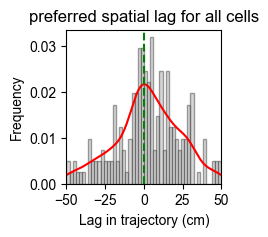

there are 180 non_grid and non_spatial_cells
there are 1 grid_cells
there are 63 non grid spatial cells
there are 117 non spatial cells
there are 23 speed cells
there are 204 cells
last_ephys_bin 22400
last_ephys_time_bin 1830.95
there are this many cells at the moment, 204
/Users/harryclark/Downloads/COHORT12_nwb/M20/D15/OF1/sub-20_day-15_ses-OF1_beh.nwb
last_ephys_bin 33500
last_ephys_time_bin 1734.35
20 15


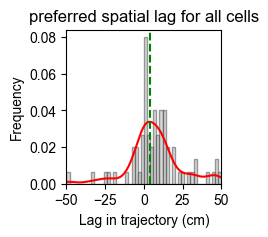

there are 68 non_grid and non_spatial_cells
there are 2 grid_cells
there are 41 non grid spatial cells
there are 27 non spatial cells
there are 3 speed cells
there are 73 cells
last_ephys_bin 33500
last_ephys_time_bin 1734.35
there are this many cells at the moment, 277
/Users/harryclark/Downloads/COHORT12_nwb/M20/D16/OF1/sub-20_day-16_ses-OF1_beh.nwb
last_ephys_bin 39200
last_ephys_time_bin 1810.45
20 16


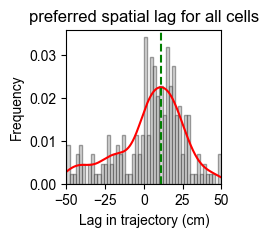

there are 188 non_grid and non_spatial_cells
there are 1 grid_cells
there are 140 non grid spatial cells
there are 48 non spatial cells
there are 30 speed cells
there are 219 cells
last_ephys_bin 39200
last_ephys_time_bin 1810.45
there are this many cells at the moment, 496
/Users/harryclark/Downloads/COHORT12_nwb/M20/D17/OF1/sub-20_day-17_ses-OF1_beh.nwb
last_ephys_bin 30700
last_ephys_time_bin 1802.35
20 17


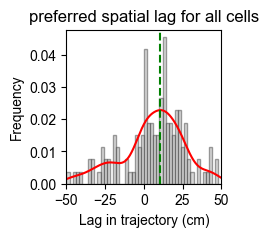

there are 117 non_grid and non_spatial_cells
there are 2 grid_cells
there are 64 non grid spatial cells
there are 53 non spatial cells
there are 13 speed cells
there are 132 cells
last_ephys_bin 30700
last_ephys_time_bin 1802.35
there are this many cells at the moment, 628
/Users/harryclark/Downloads/COHORT12_nwb/M20/D18/OF1/sub-20_day-18_ses-OF1_beh.nwb
last_ephys_bin 36900
last_ephys_time_bin 1833.95
20 18


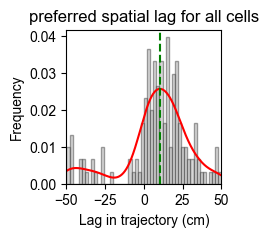

there are 147 non_grid and non_spatial_cells
there are 0 grid_cells
there are 94 non grid spatial cells
there are 53 non spatial cells
there are 4 speed cells
there are 151 cells
last_ephys_bin 36900
last_ephys_time_bin 1833.95
there are this many cells at the moment, 779
/Users/harryclark/Downloads/COHORT12_nwb/M20/D19/OF1/sub-20_day-19_ses-OF1_beh.nwb
last_ephys_bin 37700
last_ephys_time_bin 1833.55
20 19


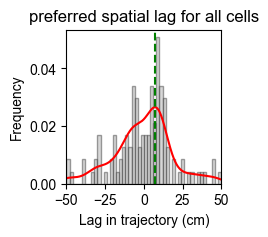

there are 111 non_grid and non_spatial_cells
there are 0 grid_cells
there are 86 non grid spatial cells
there are 25 non spatial cells
there are 6 speed cells
there are 117 cells
last_ephys_bin 37700
last_ephys_time_bin 1833.55
there are this many cells at the moment, 896
/Users/harryclark/Downloads/COHORT12_nwb/M20/D20/OF1/sub-20_day-20_ses-OF1_beh.nwb
last_ephys_bin 36600
last_ephys_time_bin 1806.350033333
20 20


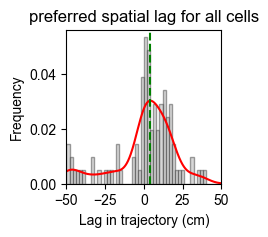

there are 95 non_grid and non_spatial_cells
there are 1 grid_cells
there are 74 non grid spatial cells
there are 21 non spatial cells
there are 7 speed cells
there are 103 cells
last_ephys_bin 36600
last_ephys_time_bin 1806.350033333
there are this many cells at the moment, 999
/Users/harryclark/Downloads/COHORT12_nwb/M20/D21/OF1/sub-20_day-21_ses-OF1_beh.nwb
last_ephys_bin 37200
last_ephys_time_bin 1802.85
20 21


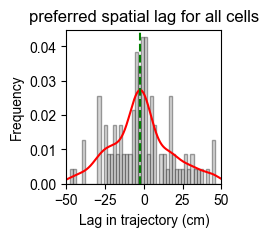

there are 113 non_grid and non_spatial_cells
there are 1 grid_cells
there are 55 non grid spatial cells
there are 58 non spatial cells
there are 2 speed cells
there are 116 cells
last_ephys_bin 37200
last_ephys_time_bin 1802.85
there are this many cells at the moment, 1115
/Users/harryclark/Downloads/COHORT12_nwb/M20/D22/OF1/sub-20_day-22_ses-OF1_beh.nwb
last_ephys_bin 39200
last_ephys_time_bin 1857.150033333
20 22


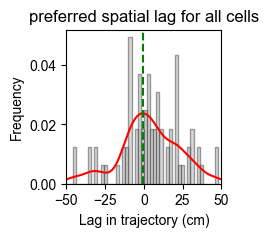

there are 75 non_grid and non_spatial_cells
there are 2 grid_cells
there are 64 non grid spatial cells
there are 11 non spatial cells
there are 3 speed cells
there are 80 cells
last_ephys_bin 39200
last_ephys_time_bin 1857.150033333
there are this many cells at the moment, 1195
/Users/harryclark/Downloads/COHORT12_nwb/M20/D23/OF1/sub-20_day-23_ses-OF1_beh.nwb
last_ephys_bin 31400
last_ephys_time_bin 1808.650066667
20 23


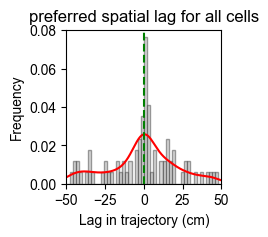

there are 70 non_grid and non_spatial_cells
there are 1 grid_cells
there are 44 non grid spatial cells
there are 26 non spatial cells
there are 14 speed cells
there are 85 cells
last_ephys_bin 31400
last_ephys_time_bin 1808.650066667
there are this many cells at the moment, 1280
/Users/harryclark/Downloads/COHORT12_nwb/M20/D24/OF1/sub-20_day-24_ses-OF1_beh.nwb
last_ephys_bin 41200
last_ephys_time_bin 1836.25
20 24


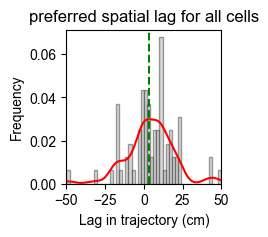

there are 80 non_grid and non_spatial_cells
there are 0 grid_cells
there are 63 non grid spatial cells
there are 17 non spatial cells
there are 0 speed cells
there are 80 cells
last_ephys_bin 41200
last_ephys_time_bin 1836.25
there are this many cells at the moment, 1360
/Users/harryclark/Downloads/COHORT12_nwb/M20/D25/OF1/sub-20_day-25_ses-OF1_beh.nwb
last_ephys_bin 39500
last_ephys_time_bin 1821.850033333
20 25


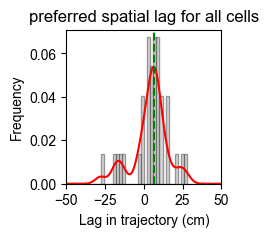

there are 28 non_grid and non_spatial_cells
there are 8 grid_cells
there are 20 non grid spatial cells
there are 8 non spatial cells
there are 0 speed cells
there are 36 cells
last_ephys_bin 39500
last_ephys_time_bin 1821.850033333
there are this many cells at the moment, 1396
/Users/harryclark/Downloads/COHORT12_nwb/M20/D26/OF1/sub-20_day-26_ses-OF1_beh.nwb
last_ephys_bin 40700
last_ephys_time_bin 1816.75
20 26


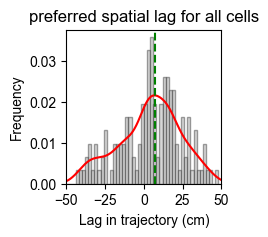

there are 143 non_grid and non_spatial_cells
there are 0 grid_cells
there are 75 non grid spatial cells
there are 68 non spatial cells
there are 11 speed cells
there are 154 cells
last_ephys_bin 40700
last_ephys_time_bin 1816.75
there are this many cells at the moment, 1550
/Users/harryclark/Downloads/COHORT12_nwb/M20/D27/OF1/sub-20_day-27_ses-OF1_beh.nwb
last_ephys_bin 41700
last_ephys_time_bin 1812.75
20 27


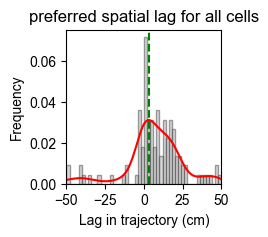

there are 101 non_grid and non_spatial_cells
there are 0 grid_cells
there are 76 non grid spatial cells
there are 25 non spatial cells
there are 8 speed cells
there are 109 cells
last_ephys_bin 41700
last_ephys_time_bin 1812.75
there are this many cells at the moment, 1659
/Users/harryclark/Downloads/COHORT12_nwb/M20/D28/OF1/sub-20_day-28_ses-OF1_beh.nwb
last_ephys_bin 43700
last_ephys_time_bin 1800.35
20 28


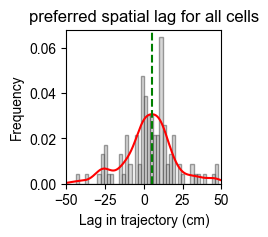

there are 88 non_grid and non_spatial_cells
there are 4 grid_cells
there are 44 non grid spatial cells
there are 44 non spatial cells
there are 21 speed cells
there are 113 cells
last_ephys_bin 43700
last_ephys_time_bin 1800.35
there are this many cells at the moment, 1772
/Users/harryclark/Downloads/COHORT12_nwb/M21/D15/OF1/sub-21_day-15_ses-OF1_beh.nwb
last_ephys_bin 8400
last_ephys_time_bin 1800.25
21 15


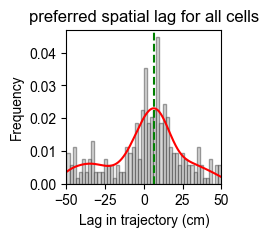

there are 173 non_grid and non_spatial_cells
there are 1 grid_cells
there are 145 non grid spatial cells
there are 28 non spatial cells
there are 68 speed cells
there are 242 cells
last_ephys_bin 8400
last_ephys_time_bin 1800.25
there are this many cells at the moment, 2014
/Users/harryclark/Downloads/COHORT12_nwb/M21/D16/OF1/sub-21_day-16_ses-OF1_beh.nwb
last_ephys_bin 10100
last_ephys_time_bin 1825.85
21 16


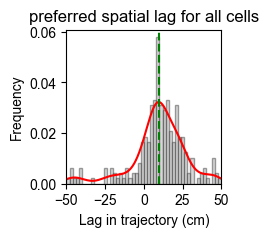

there are 201 non_grid and non_spatial_cells
there are 8 grid_cells
there are 164 non grid spatial cells
there are 37 non spatial cells
there are 31 speed cells
there are 240 cells
last_ephys_bin 10100
last_ephys_time_bin 1825.85
there are this many cells at the moment, 2254
/Users/harryclark/Downloads/COHORT12_nwb/M21/D17/OF1/sub-21_day-17_ses-OF1_beh.nwb
last_ephys_bin 10500
last_ephys_time_bin 1826.15
21 17


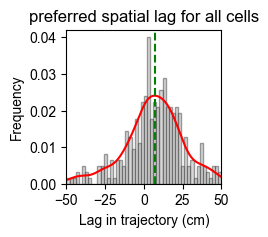

there are 214 non_grid and non_spatial_cells
there are 2 grid_cells
there are 160 non grid spatial cells
there are 54 non spatial cells
there are 48 speed cells
there are 264 cells
last_ephys_bin 10500
last_ephys_time_bin 1826.15
there are this many cells at the moment, 2518
/Users/harryclark/Downloads/COHORT12_nwb/M21/D18/OF1/sub-21_day-18_ses-OF1_beh.nwb
last_ephys_bin 13000
last_ephys_time_bin 1800.55
21 18


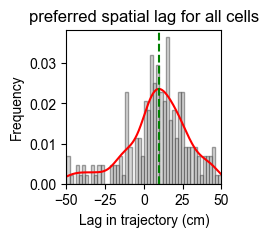

there are 145 non_grid and non_spatial_cells
there are 1 grid_cells
there are 119 non grid spatial cells
there are 26 non spatial cells
there are 40 speed cells
there are 186 cells
last_ephys_bin 13000
last_ephys_time_bin 1800.55
there are this many cells at the moment, 2704
/Users/harryclark/Downloads/COHORT12_nwb/M21/D19/OF1/sub-21_day-19_ses-OF1_beh.nwb
last_ephys_bin 10900
last_ephys_time_bin 1819.550033333
21 19


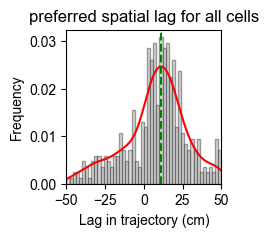

there are 376 non_grid and non_spatial_cells
there are 3 grid_cells
there are 297 non grid spatial cells
there are 79 non spatial cells
there are 34 speed cells
there are 413 cells
last_ephys_bin 10900
last_ephys_time_bin 1819.550033333
there are this many cells at the moment, 3117
/Users/harryclark/Downloads/COHORT12_nwb/M21/D20/OF1/sub-21_day-20_ses-OF1_beh.nwb
last_ephys_bin 12100
last_ephys_time_bin 1822.350033333
21 20


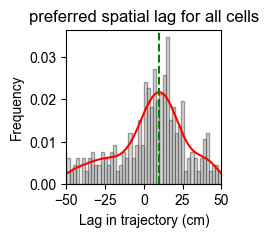

there are 297 non_grid and non_spatial_cells
there are 3 grid_cells
there are 228 non grid spatial cells
there are 69 non spatial cells
there are 26 speed cells
there are 326 cells
last_ephys_bin 12100
last_ephys_time_bin 1822.350033333
there are this many cells at the moment, 3443
/Users/harryclark/Downloads/COHORT12_nwb/M21/D21/OF1/sub-21_day-21_ses-OF1_beh.nwb
last_ephys_bin 16800
last_ephys_time_bin 1853.650033333
21 21


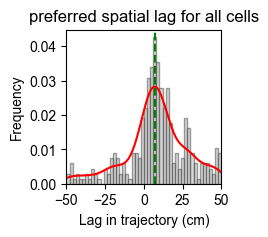

there are 274 non_grid and non_spatial_cells
there are 26 grid_cells
there are 179 non grid spatial cells
there are 95 non spatial cells
there are 15 speed cells
there are 315 cells
last_ephys_bin 16800
last_ephys_time_bin 1853.650033333
there are this many cells at the moment, 3758
/Users/harryclark/Downloads/COHORT12_nwb/M21/D22/OF1/sub-21_day-22_ses-OF1_beh.nwb
last_ephys_bin 19600
last_ephys_time_bin 1882.95
21 22


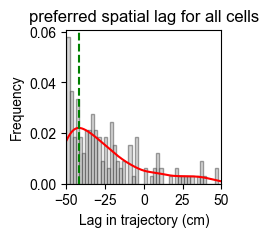

there are 128 non_grid and non_spatial_cells
there are 1 grid_cells
there are 63 non grid spatial cells
there are 65 non spatial cells
there are 12 speed cells
there are 141 cells
last_ephys_bin 19600
last_ephys_time_bin 1882.95
there are this many cells at the moment, 3899
/Users/harryclark/Downloads/COHORT12_nwb/M21/D23/OF1/sub-21_day-23_ses-OF1_beh.nwb
last_ephys_bin 27100
last_ephys_time_bin 1961.45
21 23


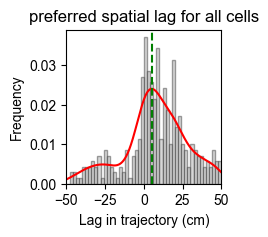

there are 323 non_grid and non_spatial_cells
there are 1 grid_cells
there are 248 non grid spatial cells
there are 75 non spatial cells
there are 20 speed cells
there are 344 cells
last_ephys_bin 27100
last_ephys_time_bin 1961.45
there are this many cells at the moment, 4243
/Users/harryclark/Downloads/COHORT12_nwb/M21/D24/OF1/sub-21_day-24_ses-OF1_beh.nwb
last_ephys_bin 26200
last_ephys_time_bin 1805.95
21 24


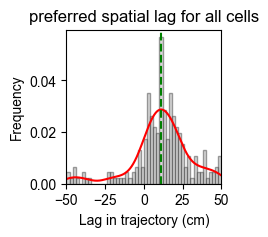

there are 210 non_grid and non_spatial_cells
there are 2 grid_cells
there are 160 non grid spatial cells
there are 50 non spatial cells
there are 6 speed cells
there are 218 cells
last_ephys_bin 26200
last_ephys_time_bin 1805.95
there are this many cells at the moment, 4461
/Users/harryclark/Downloads/COHORT12_nwb/M21/D25/OF1/sub-21_day-25_ses-OF1_beh.nwb
last_ephys_bin 17800
last_ephys_time_bin 1810.650033333
21 25


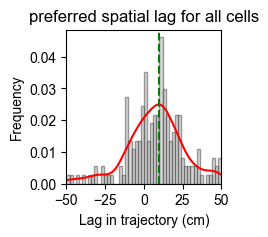

there are 170 non_grid and non_spatial_cells
there are 0 grid_cells
there are 107 non grid spatial cells
there are 63 non spatial cells
there are 6 speed cells
there are 176 cells
last_ephys_bin 17800
last_ephys_time_bin 1810.650033333
there are this many cells at the moment, 4637
/Users/harryclark/Downloads/COHORT12_nwb/M21/D26/OF1/sub-21_day-26_ses-OF1_beh.nwb
last_ephys_bin 19000
last_ephys_time_bin 1800.350033333
21 26


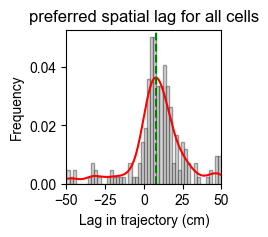

there are 175 non_grid and non_spatial_cells
there are 12 grid_cells
there are 152 non grid spatial cells
there are 23 non spatial cells
there are 4 speed cells
there are 191 cells
last_ephys_bin 19000
last_ephys_time_bin 1800.350033333
there are this many cells at the moment, 4828
/Users/harryclark/Downloads/COHORT12_nwb/M21/D27/OF1/sub-21_day-27_ses-OF1_beh.nwb
last_ephys_bin 29900
last_ephys_time_bin 1816.15
21 27


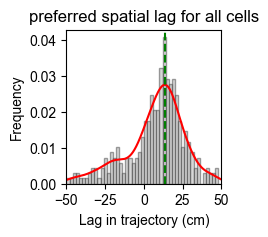

there are 321 non_grid and non_spatial_cells
there are 0 grid_cells
there are 249 non grid spatial cells
there are 72 non spatial cells
there are 10 speed cells
there are 331 cells
last_ephys_bin 29900
last_ephys_time_bin 1816.15
there are this many cells at the moment, 5159
/Users/harryclark/Downloads/COHORT12_nwb/M21/D28/OF1/sub-21_day-28_ses-OF1_beh.nwb
last_ephys_bin 31200
last_ephys_time_bin 1857.75
21 28


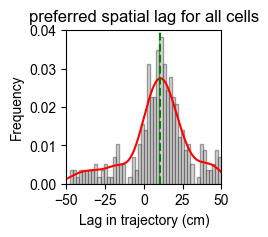

there are 274 non_grid and non_spatial_cells
there are 1 grid_cells
there are 204 non grid spatial cells
there are 70 non spatial cells
there are 8 speed cells
there are 283 cells
last_ephys_bin 31200
last_ephys_time_bin 1857.75
there are this many cells at the moment, 5442
/Users/harryclark/Downloads/COHORT12_nwb/M22/D33/OF1/sub-22_day-33_ses-OF1_beh.nwb
last_ephys_bin 18400
last_ephys_time_bin 1807.45
22 33


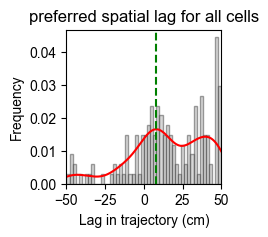

there are 116 non_grid and non_spatial_cells
there are 2 grid_cells
there are 86 non grid spatial cells
there are 30 non spatial cells
there are 50 speed cells
there are 168 cells
last_ephys_bin 18400
last_ephys_time_bin 1807.45
there are this many cells at the moment, 5610
/Users/harryclark/Downloads/COHORT12_nwb/M22/D34/OF1/sub-22_day-34_ses-OF1_beh.nwb
last_ephys_bin 19000
last_ephys_time_bin 1802.95
22 34


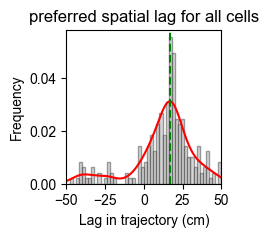

there are 195 non_grid and non_spatial_cells
there are 1 grid_cells
there are 132 non grid spatial cells
there are 63 non spatial cells
there are 24 speed cells
there are 220 cells
last_ephys_bin 19000
last_ephys_time_bin 1802.95
there are this many cells at the moment, 5830
/Users/harryclark/Downloads/COHORT12_nwb/M22/D35/OF1/sub-22_day-35_ses-OF1_beh.nwb
last_ephys_bin 21900
last_ephys_time_bin 1800.550733333
22 35


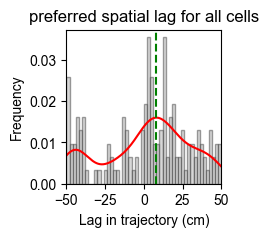

there are 149 non_grid and non_spatial_cells
there are 3 grid_cells
there are 0 non grid spatial cells
there are 149 non spatial cells
there are 3 speed cells
there are 155 cells
last_ephys_bin 21900
last_ephys_time_bin 1800.550733333
there are this many cells at the moment, 5985
/Users/harryclark/Downloads/COHORT12_nwb/M22/D36/OF1/sub-22_day-36_ses-OF1_beh.nwb
last_ephys_bin 25200
last_ephys_time_bin 1832.05
22 36


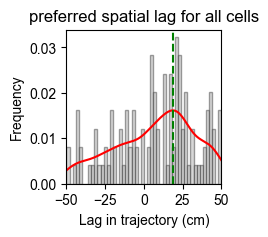

there are 78 non_grid and non_spatial_cells
there are 0 grid_cells
there are 58 non grid spatial cells
there are 20 non spatial cells
there are 41 speed cells
there are 119 cells
last_ephys_bin 25200
last_ephys_time_bin 1832.05
there are this many cells at the moment, 6104
/Users/harryclark/Downloads/COHORT12_nwb/M22/D37/OF1/sub-22_day-37_ses-OF1_beh.nwb
last_ephys_bin 22600
last_ephys_time_bin 1807.75
22 37


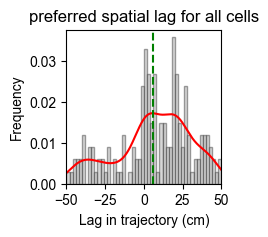

there are 79 non_grid and non_spatial_cells
there are 2 grid_cells
there are 61 non grid spatial cells
there are 18 non spatial cells
there are 84 speed cells
there are 165 cells
last_ephys_bin 22600
last_ephys_time_bin 1807.75
there are this many cells at the moment, 6269
/Users/harryclark/Downloads/COHORT12_nwb/M22/D38/OF1/sub-22_day-38_ses-OF1_beh.nwb
last_ephys_bin 24600
last_ephys_time_bin 1807.65
22 38


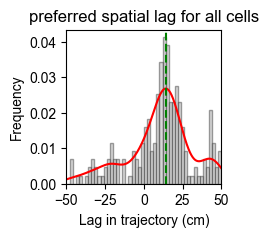

there are 143 non_grid and non_spatial_cells
there are 0 grid_cells
there are 124 non grid spatial cells
there are 19 non spatial cells
there are 68 speed cells
there are 211 cells
last_ephys_bin 24600
last_ephys_time_bin 1807.65
there are this many cells at the moment, 6480
/Users/harryclark/Downloads/COHORT12_nwb/M22/D39/OF1/sub-22_day-39_ses-OF1_beh.nwb
last_ephys_bin 26600
last_ephys_time_bin 1800.55
22 39


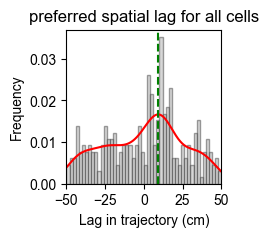

there are 263 non_grid and non_spatial_cells
there are 2 grid_cells
there are 88 non grid spatial cells
there are 175 non spatial cells
there are 60 speed cells
there are 325 cells
last_ephys_bin 26600
last_ephys_time_bin 1800.55
there are this many cells at the moment, 6805
/Users/harryclark/Downloads/COHORT12_nwb/M22/D40/OF1/sub-22_day-40_ses-OF1_beh.nwb
last_ephys_bin 27000
last_ephys_time_bin 1788.762866667
22 40


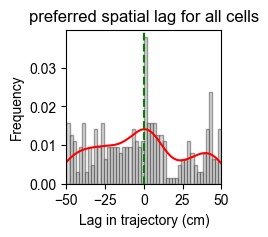

there are 314 non_grid and non_spatial_cells
there are 2 grid_cells
there are 9 non grid spatial cells
there are 305 non spatial cells
there are 0 speed cells
there are 316 cells
last_ephys_bin 27000
last_ephys_time_bin 1788.762866667
there are this many cells at the moment, 7121
/Users/harryclark/Downloads/COHORT12_nwb/M22/D41/OF1/sub-22_day-41_ses-OF1_beh.nwb
last_ephys_bin 24900
last_ephys_time_bin 1801.05
22 41


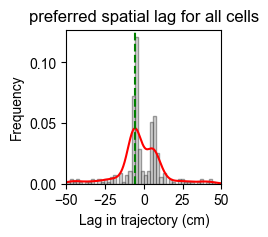

there are 213 non_grid and non_spatial_cells
there are 5 grid_cells
there are 89 non grid spatial cells
there are 124 non spatial cells
there are 58 speed cells
there are 276 cells
last_ephys_bin 24900
last_ephys_time_bin 1801.05
there are this many cells at the moment, 7397
/Users/harryclark/Downloads/COHORT12_nwb/M25/D16/OF1/sub-25_day-16_ses-OF1_beh.nwb
last_ephys_bin 27300
last_ephys_time_bin 1858.45
25 16


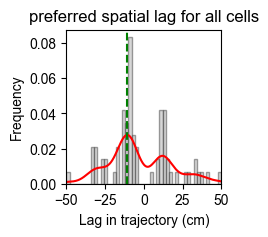

there are 34 non_grid and non_spatial_cells
there are 0 grid_cells
there are 27 non grid spatial cells
there are 7 non spatial cells
there are 4 speed cells
there are 38 cells
last_ephys_bin 27300
last_ephys_time_bin 1858.45
there are this many cells at the moment, 7435
/Users/harryclark/Downloads/COHORT12_nwb/M25/D17/OF1/sub-25_day-17_ses-OF1_beh.nwb
last_ephys_bin 16300
last_ephys_time_bin 1883.750033333
25 17


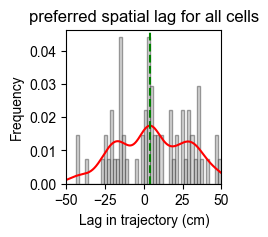

there are 58 non_grid and non_spatial_cells
there are 0 grid_cells
there are 11 non grid spatial cells
there are 47 non spatial cells
there are 10 speed cells
there are 68 cells
last_ephys_bin 16300
last_ephys_time_bin 1883.750033333
there are this many cells at the moment, 7503
/Users/harryclark/Downloads/COHORT12_nwb/M25/D18/OF1/sub-25_day-18_ses-OF1_beh.nwb
last_ephys_bin 10600
last_ephys_time_bin 1872.95
25 18


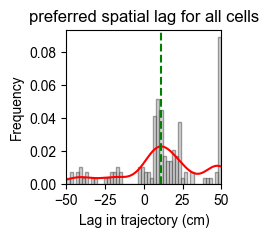

there are 92 non_grid and non_spatial_cells
there are 4 grid_cells
there are 43 non grid spatial cells
there are 49 non spatial cells
there are 50 speed cells
there are 146 cells
last_ephys_bin 10600
last_ephys_time_bin 1872.95
there are this many cells at the moment, 7649
/Users/harryclark/Downloads/COHORT12_nwb/M25/D19/OF1/sub-25_day-19_ses-OF1_beh.nwb
last_ephys_bin 18200
last_ephys_time_bin 1892.45
25 19


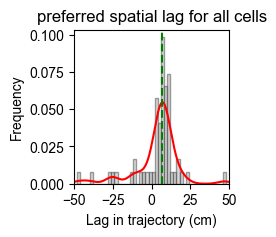

there are 39 non_grid and non_spatial_cells
there are 7 grid_cells
there are 34 non grid spatial cells
there are 5 non spatial cells
there are 13 speed cells
there are 59 cells
last_ephys_bin 18200
last_ephys_time_bin 1892.45
there are this many cells at the moment, 7708
/Users/harryclark/Downloads/COHORT12_nwb/M25/D20/OF1/sub-25_day-20_ses-OF1_beh.nwb
last_ephys_bin 35100
last_ephys_time_bin 1806.65
25 20


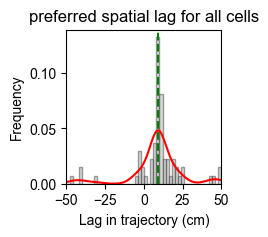

there are 47 non_grid and non_spatial_cells
there are 7 grid_cells
there are 42 non grid spatial cells
there are 5 non spatial cells
there are 13 speed cells
there are 67 cells
last_ephys_bin 35100
last_ephys_time_bin 1806.65
there are this many cells at the moment, 7775
/Users/harryclark/Downloads/COHORT12_nwb/M25/D21/OF1/sub-25_day-21_ses-OF1_beh.nwb
last_ephys_bin 27000
last_ephys_time_bin 1817.750066667
25 21


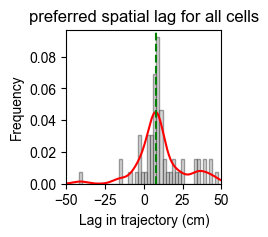

there are 31 non_grid and non_spatial_cells
there are 15 grid_cells
there are 25 non grid spatial cells
there are 6 non spatial cells
there are 18 speed cells
there are 64 cells
last_ephys_bin 27000
last_ephys_time_bin 1817.750066667
there are this many cells at the moment, 7839
/Users/harryclark/Downloads/COHORT12_nwb/M25/D22/OF1/sub-25_day-22_ses-OF1_beh.nwb
last_ephys_bin 14700
last_ephys_time_bin 1831.950033333
25 22


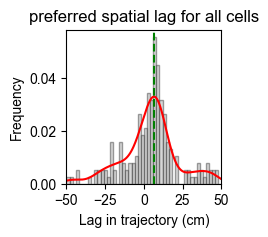

there are 137 non_grid and non_spatial_cells
there are 5 grid_cells
there are 73 non grid spatial cells
there are 64 non spatial cells
there are 47 speed cells
there are 189 cells
last_ephys_bin 14700
last_ephys_time_bin 1831.950033333
there are this many cells at the moment, 8028
/Users/harryclark/Downloads/COHORT12_nwb/M25/D23/OF1/sub-25_day-23_ses-OF1_beh.nwb
last_ephys_bin 20300
last_ephys_time_bin 1656.45
25 23


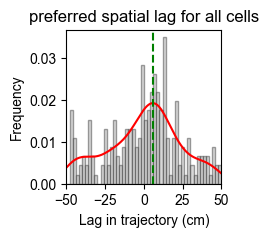

there are 212 non_grid and non_spatial_cells
there are 1 grid_cells
there are 86 non grid spatial cells
there are 126 non spatial cells
there are 14 speed cells
there are 227 cells
last_ephys_bin 20300
last_ephys_time_bin 1656.45
there are this many cells at the moment, 8255
/Users/harryclark/Downloads/COHORT12_nwb/M25/D24/OF1/sub-25_day-24_ses-OF1_beh.nwb
last_ephys_bin 22500
last_ephys_time_bin 1857.65
25 24


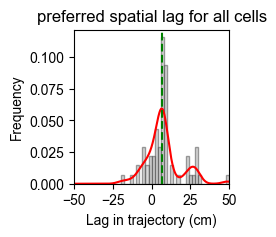

there are 45 non_grid and non_spatial_cells
there are 18 grid_cells
there are 38 non grid spatial cells
there are 7 non spatial cells
there are 6 speed cells
there are 69 cells
last_ephys_bin 22500
last_ephys_time_bin 1857.65
there are this many cells at the moment, 8324
/Users/harryclark/Downloads/COHORT12_nwb/M25/D25/OF1/sub-25_day-25_ses-OF1_beh.nwb
last_ephys_bin 21800
last_ephys_time_bin 1807.25
25 25


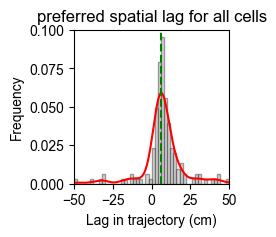

there are 109 non_grid and non_spatial_cells
there are 21 grid_cells
there are 81 non grid spatial cells
there are 28 non spatial cells
there are 22 speed cells
there are 152 cells
last_ephys_bin 21800
last_ephys_time_bin 1807.25
there are this many cells at the moment, 8476
/Users/harryclark/Downloads/COHORT12_nwb/M26/D11/OF1/sub-26_day-11_ses-OF1_beh.nwb
last_ephys_bin 22400
last_ephys_time_bin 1957.75
26 11


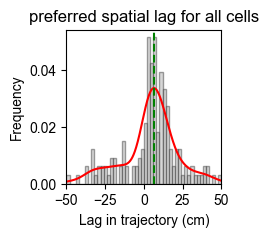

there are 130 non_grid and non_spatial_cells
there are 3 grid_cells
there are 113 non grid spatial cells
there are 17 non spatial cells
there are 31 speed cells
there are 164 cells
last_ephys_bin 22400
last_ephys_time_bin 1957.75
there are this many cells at the moment, 8640
/Users/harryclark/Downloads/COHORT12_nwb/M26/D12/OF1/sub-26_day-12_ses-OF1_beh.nwb
last_ephys_bin 26400
last_ephys_time_bin 1811.65
26 12


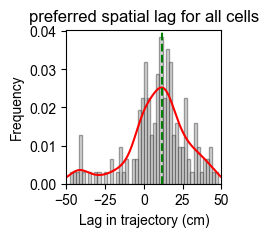

there are 101 non_grid and non_spatial_cells
there are 2 grid_cells
there are 82 non grid spatial cells
there are 19 non spatial cells
there are 50 speed cells
there are 153 cells
last_ephys_bin 26400
last_ephys_time_bin 1811.65
there are this many cells at the moment, 8793
/Users/harryclark/Downloads/COHORT12_nwb/M26/D13/OF1/sub-26_day-13_ses-OF1_beh.nwb
last_ephys_bin 28300
last_ephys_time_bin 1785.75
26 13


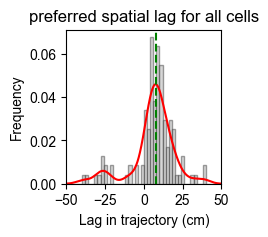

there are 84 non_grid and non_spatial_cells
there are 2 grid_cells
there are 81 non grid spatial cells
there are 3 non spatial cells
there are 11 speed cells
there are 97 cells
last_ephys_bin 28300
last_ephys_time_bin 1785.75
there are this many cells at the moment, 8890
/Users/harryclark/Downloads/COHORT12_nwb/M26/D14/OF1/sub-26_day-14_ses-OF1_beh.nwb
last_ephys_bin 33400
last_ephys_time_bin 1809.0501
26 14


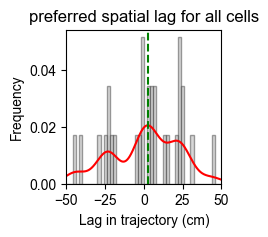

there are 7 non_grid and non_spatial_cells
there are 0 grid_cells
there are 2 non grid spatial cells
there are 5 non spatial cells
there are 3 speed cells
there are 10 cells
last_ephys_bin 33400
last_ephys_time_bin 1809.0501
there are this many cells at the moment, 8900
/Users/harryclark/Downloads/COHORT12_nwb/M26/D15/OF1/sub-26_day-15_ses-OF1_beh.nwb
last_ephys_bin 27000
last_ephys_time_bin 1812.65
26 15


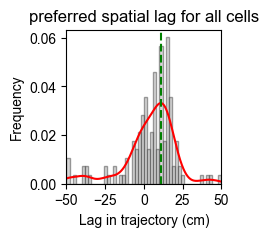

there are 102 non_grid and non_spatial_cells
there are 5 grid_cells
there are 82 non grid spatial cells
there are 20 non spatial cells
there are 34 speed cells
there are 141 cells
last_ephys_bin 27000
last_ephys_time_bin 1812.65
there are this many cells at the moment, 9041
/Users/harryclark/Downloads/COHORT12_nwb/M26/D16/OF1/sub-26_day-16_ses-OF1_beh.nwb
last_ephys_bin 27600
last_ephys_time_bin 1808.85
26 16


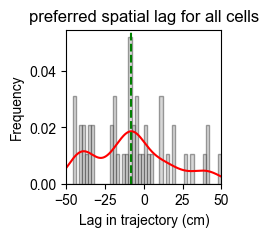

there are 43 non_grid and non_spatial_cells
there are 0 grid_cells
there are 33 non grid spatial cells
there are 10 non spatial cells
there are 5 speed cells
there are 48 cells
last_ephys_bin 27600
last_ephys_time_bin 1808.85
there are this many cells at the moment, 9089
/Users/harryclark/Downloads/COHORT12_nwb/M26/D17/OF1/sub-26_day-17_ses-OF1_beh.nwb
last_ephys_bin 28400
last_ephys_time_bin 1843.050033333
26 17


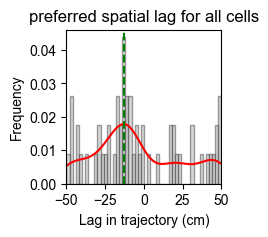

there are 21 non_grid and non_spatial_cells
there are 1 grid_cells
there are 6 non grid spatial cells
there are 15 non spatial cells
there are 3 speed cells
there are 25 cells
last_ephys_bin 28400
last_ephys_time_bin 1843.050033333
there are this many cells at the moment, 9114
/Users/harryclark/Downloads/COHORT12_nwb/M26/D18/OF1/sub-26_day-18_ses-OF1_beh.nwb
last_ephys_bin 32000
last_ephys_time_bin 1802.15
26 18


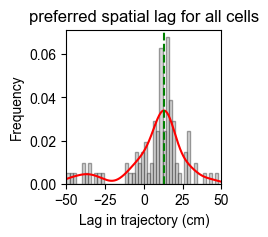

there are 73 non_grid and non_spatial_cells
there are 5 grid_cells
there are 66 non grid spatial cells
there are 7 non spatial cells
there are 16 speed cells
there are 94 cells
last_ephys_bin 32000
last_ephys_time_bin 1802.15
there are this many cells at the moment, 9208
/Users/harryclark/Downloads/COHORT12_nwb/M26/D19/OF1/sub-26_day-19_ses-OF1_beh.nwb
last_ephys_bin 33200
last_ephys_time_bin 1828.35
26 19


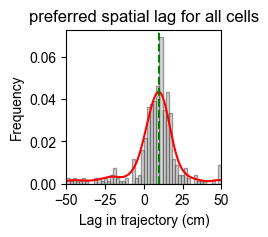

there are 282 non_grid and non_spatial_cells
there are 17 grid_cells
there are 258 non grid spatial cells
there are 24 non spatial cells
there are 43 speed cells
there are 342 cells
last_ephys_bin 33200
last_ephys_time_bin 1828.35
there are this many cells at the moment, 9550
/Users/harryclark/Downloads/COHORT12_nwb/M27/D16/OF1/sub-27_day-16_ses-OF1_beh.nwb
last_ephys_bin 19200
last_ephys_time_bin 1801.35
27 16


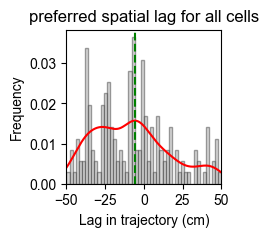

there are 17 non_grid and non_spatial_cells
there are 0 grid_cells
there are 2 non grid spatial cells
there are 15 non spatial cells
there are 2 speed cells
there are 19 cells
last_ephys_bin 19200
last_ephys_time_bin 1801.35
there are this many cells at the moment, 9569
/Users/harryclark/Downloads/COHORT12_nwb/M27/D17/OF1/sub-27_day-17_ses-OF1_beh.nwb
last_ephys_bin 34900
last_ephys_time_bin 1814.65
27 17


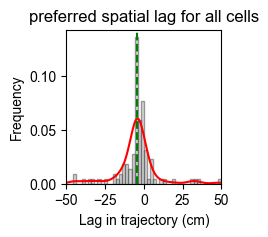

there are 24 non_grid and non_spatial_cells
there are 0 grid_cells
there are 24 non grid spatial cells
there are 0 non spatial cells
there are 1 speed cells
there are 25 cells
last_ephys_bin 34900
last_ephys_time_bin 1814.65
there are this many cells at the moment, 9594
/Users/harryclark/Downloads/COHORT12_nwb/M27/D18/OF1/sub-27_day-18_ses-OF1_beh.nwb
last_ephys_bin 41100
last_ephys_time_bin 1869.45
27 18


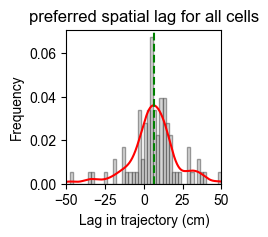

there are 64 non_grid and non_spatial_cells
there are 0 grid_cells
there are 60 non grid spatial cells
there are 4 non spatial cells
there are 11 speed cells
there are 75 cells
last_ephys_bin 41100
last_ephys_time_bin 1869.45
there are this many cells at the moment, 9669
/Users/harryclark/Downloads/COHORT12_nwb/M27/D19/OF1/sub-27_day-19_ses-OF1_beh.nwb
last_ephys_bin 35700
last_ephys_time_bin 1812.25
27 19


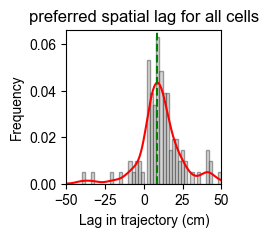

there are 73 non_grid and non_spatial_cells
there are 1 grid_cells
there are 65 non grid spatial cells
there are 8 non spatial cells
there are 9 speed cells
there are 83 cells
last_ephys_bin 35700
last_ephys_time_bin 1812.25
there are this many cells at the moment, 9752
/Users/harryclark/Downloads/COHORT12_nwb/M27/D20/OF1/sub-27_day-20_ses-OF1_beh.nwb
last_ephys_bin 37200
last_ephys_time_bin 1816.350033333
27 20


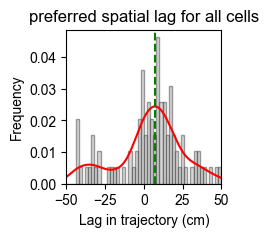

there are 21 non_grid and non_spatial_cells
there are 7 grid_cells
there are 18 non grid spatial cells
there are 3 non spatial cells
there are 2 speed cells
there are 30 cells
last_ephys_bin 37200
last_ephys_time_bin 1816.350033333
there are this many cells at the moment, 9782
/Users/harryclark/Downloads/COHORT12_nwb/M27/D21/OF1/sub-27_day-21_ses-OF1_beh.nwb
last_ephys_bin 32200
last_ephys_time_bin 1833.550066667
27 21


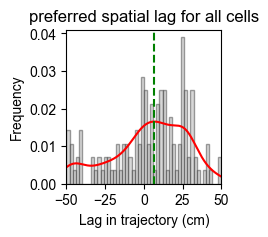

there are 36 non_grid and non_spatial_cells
there are 2 grid_cells
there are 20 non grid spatial cells
there are 16 non spatial cells
there are 18 speed cells
there are 56 cells
last_ephys_bin 32200
last_ephys_time_bin 1833.550066667
there are this many cells at the moment, 9838
/Users/harryclark/Downloads/COHORT12_nwb/M27/D22/OF1/sub-27_day-22_ses-OF1_beh.nwb
last_ephys_bin 27100
last_ephys_time_bin 1742.050033333
27 22


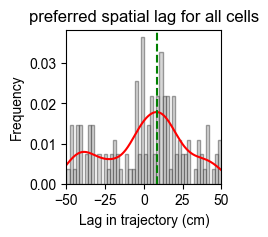

there are 50 non_grid and non_spatial_cells
there are 0 grid_cells
there are 29 non grid spatial cells
there are 21 non spatial cells
there are 15 speed cells
there are 65 cells
last_ephys_bin 27100
last_ephys_time_bin 1742.050033333
there are this many cells at the moment, 9903
/Users/harryclark/Downloads/COHORT12_nwb/M27/D23/OF1/sub-27_day-23_ses-OF1_beh.nwb
last_ephys_bin 39600
last_ephys_time_bin 1834.55
27 23


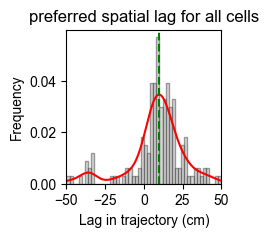

there are 104 non_grid and non_spatial_cells
there are 6 grid_cells
there are 100 non grid spatial cells
there are 4 non spatial cells
there are 2 speed cells
there are 112 cells
last_ephys_bin 39600
last_ephys_time_bin 1834.55
there are this many cells at the moment, 10015
/Users/harryclark/Downloads/COHORT12_nwb/M27/D24/OF1/sub-27_day-24_ses-OF1_beh.nwb
last_ephys_bin 36600
last_ephys_time_bin 1802.050033333
27 24


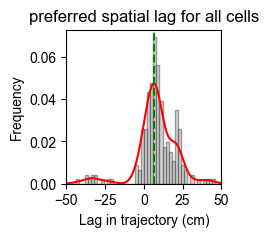

there are 185 non_grid and non_spatial_cells
there are 1 grid_cells
there are 175 non grid spatial cells
there are 10 non spatial cells
there are 3 speed cells
there are 189 cells
last_ephys_bin 36600
last_ephys_time_bin 1802.050033333
there are this many cells at the moment, 10204
/Users/harryclark/Downloads/COHORT12_nwb/M27/D26/OF1/sub-27_day-26_ses-OF1_beh.nwb
last_ephys_bin 36200
last_ephys_time_bin 1788.25
27 26


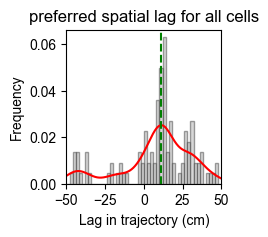

there are 26 non_grid and non_spatial_cells
there are 7 grid_cells
there are 22 non grid spatial cells
there are 4 non spatial cells
there are 2 speed cells
there are 35 cells
last_ephys_bin 36200
last_ephys_time_bin 1788.25
there are this many cells at the moment, 10239
/Users/harryclark/Downloads/COHORT12_nwb/M28/D16/OF1/sub-28_day-16_ses-OF1_beh.nwb
last_ephys_bin 13400
last_ephys_time_bin 1864.35
28 16


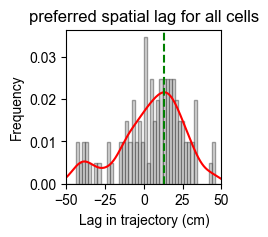

there are 49 non_grid and non_spatial_cells
there are 2 grid_cells
there are 40 non grid spatial cells
there are 9 non spatial cells
there are 50 speed cells
there are 101 cells
last_ephys_bin 13400
last_ephys_time_bin 1864.35
there are this many cells at the moment, 10340
/Users/harryclark/Downloads/COHORT12_nwb/M28/D17/OF1/sub-28_day-17_ses-OF1_beh.nwb
last_ephys_bin 13200
last_ephys_time_bin 2091.85
28 17


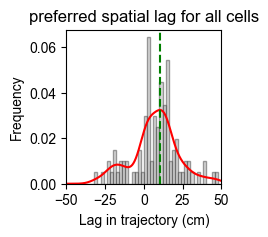

there are 73 non_grid and non_spatial_cells
there are 1 grid_cells
there are 64 non grid spatial cells
there are 9 non spatial cells
there are 25 speed cells
there are 99 cells
last_ephys_bin 13200
last_ephys_time_bin 2091.85
there are this many cells at the moment, 10439
/Users/harryclark/Downloads/COHORT12_nwb/M28/D18/OF1/sub-28_day-18_ses-OF1_beh.nwb
last_ephys_bin 15400
last_ephys_time_bin 1984.45
28 18


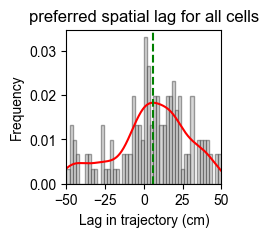

there are 107 non_grid and non_spatial_cells
there are 1 grid_cells
there are 66 non grid spatial cells
there are 41 non spatial cells
there are 43 speed cells
there are 151 cells
last_ephys_bin 15400
last_ephys_time_bin 1984.45
there are this many cells at the moment, 10590
/Users/harryclark/Downloads/COHORT12_nwb/M28/D19/OF1/sub-28_day-19_ses-OF1_beh.nwb
last_ephys_bin 15300
last_ephys_time_bin 1952.15
28 19


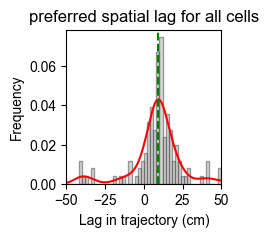

there are 93 non_grid and non_spatial_cells
there are 10 grid_cells
there are 89 non grid spatial cells
there are 4 non spatial cells
there are 17 speed cells
there are 120 cells
last_ephys_bin 15300
last_ephys_time_bin 1952.15
there are this many cells at the moment, 10710
/Users/harryclark/Downloads/COHORT12_nwb/M28/D20/OF1/sub-28_day-20_ses-OF1_beh.nwb
last_ephys_bin 17100
last_ephys_time_bin 2121.150033333
28 20


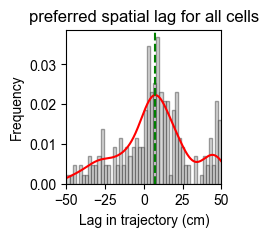

there are 167 non_grid and non_spatial_cells
there are 1 grid_cells
there are 127 non grid spatial cells
there are 40 non spatial cells
there are 46 speed cells
there are 214 cells
last_ephys_bin 17100
last_ephys_time_bin 2121.150033333
there are this many cells at the moment, 10924
/Users/harryclark/Downloads/COHORT12_nwb/M28/D21/OF1/sub-28_day-21_ses-OF1_beh.nwb
last_ephys_bin 16400
last_ephys_time_bin 1888.550066667
28 21


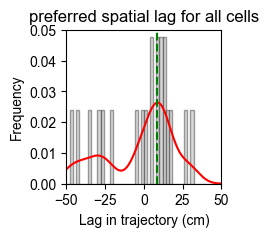

there are 13 non_grid and non_spatial_cells
there are 1 grid_cells
there are 9 non grid spatial cells
there are 4 non spatial cells
there are 7 speed cells
there are 21 cells
last_ephys_bin 16400
last_ephys_time_bin 1888.550066667
there are this many cells at the moment, 10945
/Users/harryclark/Downloads/COHORT12_nwb/M28/D22/OF1/sub-28_day-22_ses-OF1_beh.nwb
last_ephys_bin 20500
last_ephys_time_bin 1934.85
28 22


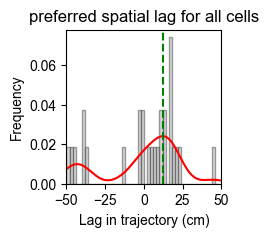

there are 19 non_grid and non_spatial_cells
there are 0 grid_cells
there are 11 non grid spatial cells
there are 8 non spatial cells
there are 4 speed cells
there are 23 cells
last_ephys_bin 20500
last_ephys_time_bin 1934.85
there are this many cells at the moment, 10968
/Users/harryclark/Downloads/COHORT12_nwb/M28/D23/OF1/sub-28_day-23_ses-OF1_beh.nwb
last_ephys_bin 18800
last_ephys_time_bin 1899.450033333
28 23


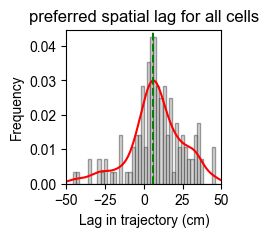

there are 113 non_grid and non_spatial_cells
there are 5 grid_cells
there are 84 non grid spatial cells
there are 29 non spatial cells
there are 22 speed cells
there are 140 cells
last_ephys_bin 18800
last_ephys_time_bin 1899.450033333
there are this many cells at the moment, 11108
/Users/harryclark/Downloads/COHORT12_nwb/M28/D25/OF1/sub-28_day-25_ses-OF1_beh.nwb
last_ephys_bin 21400
last_ephys_time_bin 2146.850033333
28 25


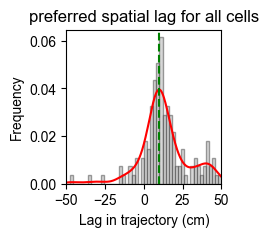

there are 109 non_grid and non_spatial_cells
there are 18 grid_cells
there are 98 non grid spatial cells
there are 11 non spatial cells
there are 8 speed cells
there are 135 cells
last_ephys_bin 21400
last_ephys_time_bin 2146.850033333
there are this many cells at the moment, 11243
/Users/harryclark/Downloads/COHORT12_nwb/M29/D16/OF1/sub-29_day-16_ses-OF1_beh.nwb
last_ephys_bin 19300
last_ephys_time_bin 2815.15
29 16


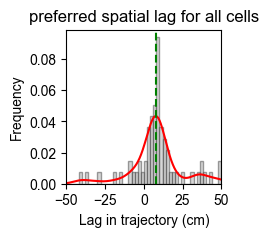

there are 43 non_grid and non_spatial_cells
there are 1 grid_cells
there are 33 non grid spatial cells
there are 10 non spatial cells
there are 12 speed cells
there are 56 cells
last_ephys_bin 19300
last_ephys_time_bin 2815.15
there are this many cells at the moment, 11299
/Users/harryclark/Downloads/COHORT12_nwb/M29/D17/OF1/sub-29_day-17_ses-OF1_beh.nwb
last_ephys_bin 18400
last_ephys_time_bin 2700.75
29 17


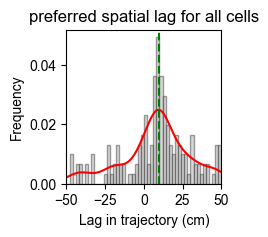

there are 120 non_grid and non_spatial_cells
there are 3 grid_cells
there are 55 non grid spatial cells
there are 65 non spatial cells
there are 29 speed cells
there are 152 cells
last_ephys_bin 18400
last_ephys_time_bin 2700.75
there are this many cells at the moment, 11451
/Users/harryclark/Downloads/COHORT12_nwb/M29/D18/OF1/sub-29_day-18_ses-OF1_beh.nwb
last_ephys_bin 17600
last_ephys_time_bin 1912.85
29 18


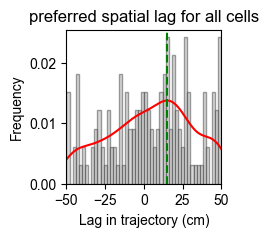

there are 142 non_grid and non_spatial_cells
there are 2 grid_cells
there are 44 non grid spatial cells
there are 98 non spatial cells
there are 21 speed cells
there are 165 cells
last_ephys_bin 17600
last_ephys_time_bin 1912.85
there are this many cells at the moment, 11616
/Users/harryclark/Downloads/COHORT12_nwb/M29/D19/OF1/sub-29_day-19_ses-OF1_beh.nwb
last_ephys_bin 18300
last_ephys_time_bin 2133.450066667
29 19


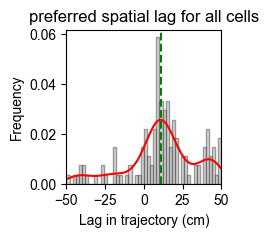

there are 108 non_grid and non_spatial_cells
there are 7 grid_cells
there are 77 non grid spatial cells
there are 31 non spatial cells
there are 21 speed cells
there are 136 cells
last_ephys_bin 18300
last_ephys_time_bin 2133.450066667
there are this many cells at the moment, 11752
/Users/harryclark/Downloads/COHORT12_nwb/M29/D20/OF1/sub-29_day-20_ses-OF1_beh.nwb
last_ephys_bin 17100
last_ephys_time_bin 2107.15
29 20


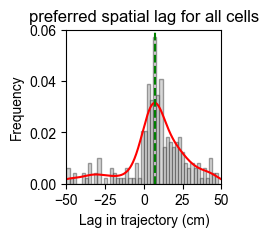

there are 197 non_grid and non_spatial_cells
there are 7 grid_cells
there are 153 non grid spatial cells
there are 44 non spatial cells
there are 38 speed cells
there are 242 cells
last_ephys_bin 17100
last_ephys_time_bin 2107.15
there are this many cells at the moment, 11994
/Users/harryclark/Downloads/COHORT12_nwb/M29/D21/OF1/sub-29_day-21_ses-OF1_beh.nwb
last_ephys_bin 20200
last_ephys_time_bin 2074.750033333
29 21


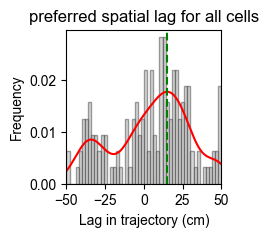

there are 128 non_grid and non_spatial_cells
there are 1 grid_cells
there are 65 non grid spatial cells
there are 63 non spatial cells
there are 25 speed cells
there are 154 cells
last_ephys_bin 20200
last_ephys_time_bin 2074.750033333
there are this many cells at the moment, 12148
/Users/harryclark/Downloads/COHORT12_nwb/M29/D22/OF1/sub-29_day-22_ses-OF1_beh.nwb
last_ephys_bin 18300
last_ephys_time_bin 1979.850066667
29 22


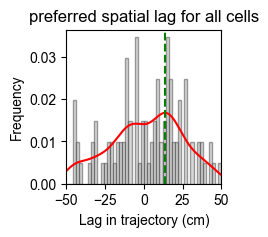

there are 68 non_grid and non_spatial_cells
there are 0 grid_cells
there are 30 non grid spatial cells
there are 38 non spatial cells
there are 12 speed cells
there are 80 cells
last_ephys_bin 18300
last_ephys_time_bin 1979.850066667
there are this many cells at the moment, 12228
/Users/harryclark/Downloads/COHORT12_nwb/M29/D23/OF1/sub-29_day-23_ses-OF1_beh.nwb
last_ephys_bin 14700
last_ephys_time_bin 1924.65
29 23


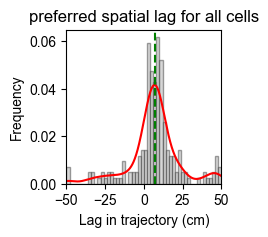

there are 164 non_grid and non_spatial_cells
there are 15 grid_cells
there are 147 non grid spatial cells
there are 17 non spatial cells
there are 30 speed cells
there are 209 cells
last_ephys_bin 14700
last_ephys_time_bin 1924.65
there are this many cells at the moment, 12437
/Users/harryclark/Downloads/COHORT12_nwb/M29/D25/OF1/sub-29_day-25_ses-OF1_beh.nwb
last_ephys_bin 18200
last_ephys_time_bin 2101.45
29 25


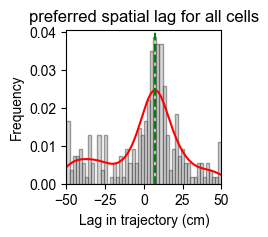

there are 198 non_grid and non_spatial_cells
there are 13 grid_cells
there are 130 non grid spatial cells
there are 68 non spatial cells
there are 59 speed cells
there are 270 cells
last_ephys_bin 18200
last_ephys_time_bin 2101.45
there are this many cells at the moment, 12707


In [5]:
args.session_type = 'OF1'

# Load session
gcs_ = pd.DataFrame()
ngs_ = pd.DataFrame()
ns_ = pd.DataFrame()
sc_ = pd.DataFrame()
ngs_ns_ = pd.DataFrame()
all_ = pd.DataFrame()

for session_path in sorted(
    list(args.storage.glob(f'*/*/{args.session_type}/*{args.session_type}_beh.nwb'))
):  
    print(session_path)
    args.mouse = int(session_path.parent.parent.parent.name[1:])
    args.day = int(session_path.parent.parent.name[1:])
    mouse_day = f'M{args.mouse}D{args.day}'
    mouse = args.mouse
    day = args.day

    [gcs, ngs, ns, sc, ngs_ns, all] = cell_classification_of1(mouse, day, percentile_threshold=99)

    _,_,_,_,_,clusters_VR = compute_vr_tcs(mouse, day)

    gcs = load_cluster_locations(clusters_VR, cells=gcs)
    ngs = load_cluster_locations(clusters_VR, cells=ngs)
    ns = load_cluster_locations(clusters_VR, cells=ns)
    sc = load_cluster_locations(clusters_VR, cells=sc)
    ngs_ns = load_cluster_locations(clusters_VR, cells=ngs_ns)
    all = load_cluster_locations(clusters_VR, cells=all)
    
    gcs_ = pd.concat([gcs_, gcs], ignore_index=True)
    ngs_ = pd.concat([ngs_, ngs], ignore_index=True)
    ns_ = pd.concat([ns_, ns], ignore_index=True)
    sc_ = pd.concat([sc_, sc], ignore_index=True)
    ngs_ns_ = pd.concat([ngs_ns_, ngs_ns], ignore_index=True)
    all_ = pd.concat([all_, all], ignore_index=True)

    print(f'there are this many cells at the moment, {len(all_)}')

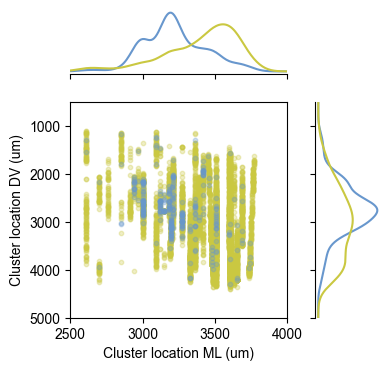

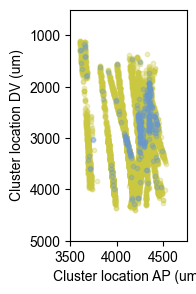

In [6]:

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(4,4), width_ratios=[1,0.3], height_ratios=[0.3,1], sharex='col', sharey='row')
ax[1,0].scatter(ngs_['coord_SCs_x']*-1, ngs_['coord_SCs_y'], color='#CAC841', alpha=0.3, s=10)
ax[1,0].scatter(gcs_['coord_SCs_x']*-1, gcs_['coord_SCs_y'], color='#6897CD', alpha=0.3,s=10)

# kde estimates 
x = np.arange(-5000, 5000, 10)
ax[0,0].plot(x, gaussian_kde(gcs_['coord_SCs_x']*-1, bw_method=0.3)(x), color='#6897CD')
ax[0,0].plot(x, gaussian_kde(ngs_['coord_SCs_x']*-1, bw_method=0.3)(x), color='#CAC841')
ax[1,1].plot(gaussian_kde(gcs_['coord_SCs_y'], bw_method=0.3)(x), x, color='#6897CD')
ax[1,1].plot(gaussian_kde(ngs_['coord_SCs_y'], bw_method=0.3)(x), x, color='#CAC841')
ax[0,1].axis('off')
ax[1,0].set_xlabel(f'Cluster location ML (um)')
ax[1,0].set_ylabel(f'Cluster location DV (um)')
ax[1,0].set_xlim(2500, 4000)
ax[1,0].set_xlim(2500, 4000)
ax[1,0].set_ylim(500, 5000)
ax[1,1].set_xticks([])
ax[0,0].set_yticks([])
ax[0,0].spines['top'].set_visible(False)
ax[0,0].spines['left'].set_visible(False)
ax[0,0].spines['right'].set_visible(False)
ax[1,1].spines['top'].set_visible(False)
ax[1,1].spines['right'].set_visible(False)
ax[1,1].spines['bottom'].set_visible(False)
ax[1,0].invert_yaxis()
plt.show()

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(1.5,3))
scatter = ax.scatter(ngs_['coord_SCs_z'], ngs_['coord_SCs_y'], color='#CAC841', alpha=0.3, s=10)
scatter = ax.scatter(gcs_['coord_SCs_z'], gcs_['coord_SCs_y'], color='#6897CD', alpha=0.3, s=10)
ax.set_xlabel(f'Cluster location AP (um)')
ax.set_ylabel(f'Cluster location DV (um)')
ax.set_xlim(3500, 4750)
ax.set_ylim(500, 5000)
ax.invert_yaxis()
plt.show()

In [25]:
np.histogram(gcs_['coord_SCs_x']*-1, weights=gcs_['optimal_travel_lag'], bins=9, range=[2200, 4000])

(array([   0.,    0.,   96.,  150., 1154.,  756.,  350.,  233.,    0.]),
 array([2200., 2400., 2600., 2800., 3000., 3200., 3400., 3600., 3800.,
        4000.]))

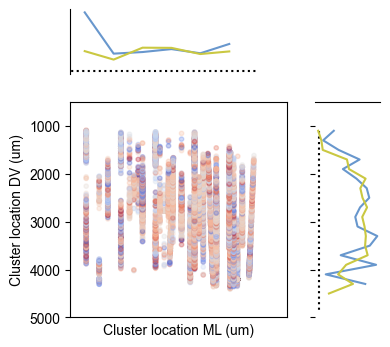

: 

In [ ]:
from matplotlib.colors import TwoSlopeNorm
norm = TwoSlopeNorm(vmin=-50, vcenter=0, vmax=50)

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(4,4), width_ratios=[1,0.3], height_ratios=[0.3,1], sharex='col', sharey='row')
ax[1,0].scatter(all_['coord_SCs_x']*-1, all_['coord_SCs_y'], c=all_['optimal_travel_lag'], alpha=0.3, s=10, cmap='coolwarm', norm=norm)

# g and ng estimates 
avg_g = np.histogram(gcs_['coord_SCs_x']*-1, weights=gcs_['optimal_travel_lag'], bins=9, range=[2200, 4000])[0]/np.histogram(gcs_['coord_SCs_x']*-1, bins=9, range=[2200, 4000])[0]
avg_ngs = np.histogram(ngs_['coord_SCs_x']*-1, weights=ngs_['optimal_travel_lag'], bins=9, range=[2200, 4000])[0]/np.histogram(ngs_['coord_SCs_x']*-1, bins=9, range=[2200, 4000])[0]
bin_centres = np.arange(2200, 4000, 200)

ax[0,0].plot(bin_centres, np.zeros(len(bin_centres)), color="#000000", linestyle='dotted')
ax[0,0].plot(bin_centres, avg_g, color='#6897CD')
ax[0,0].plot(bin_centres, avg_ngs, color='#CAC841')


avg_g = np.histogram(gcs_['coord_SCs_y'], weights=gcs_['optimal_travel_lag'], bins=20, range=[1000, 5000])[0]/np.histogram(gcs_['coord_SCs_y'], bins=20, range=[1000, 5000])[0]
avg_ngs = np.histogram(ngs_['coord_SCs_y'], weights=ngs_['optimal_travel_lag'], bins=20, range=[1000, 5000])[0]/np.histogram(ngs_['coord_SCs_y'], bins=20, range=[1000, 5000])[0]
bin_centres = np.arange(1100, 5000, 200)

ax[1,1].plot(np.zeros(len(bin_centres)), bin_centres, color="#000000", linestyle='dotted')
ax[1,1].plot(avg_g, bin_centres, color='#6897CD')
ax[1,1].plot(avg_ngs, bin_centres, color='#CAC841')

x = np.arange(-5000, 5000, 10)
ax[0,1].axis('off')
ax[1,0].set_xlabel(f'Cluster location ML (um)')
ax[1,0].set_ylabel(f'Cluster location DV (um)')
ax[1,0].set_xlim(2500, 4000)
ax[1,0].set_xlim(2500, 4000)
ax[1,0].set_ylim(500, 5000)
ax[1,1].set_xticks([])
ax[0,0].set_yticks([])
ax[0,0].set_xticks([])
ax[0,0].spines['top'].set_visible(False)
ax[0,0].spines['right'].set_visible(False)
ax[0,0].spines['bottom'].set_visible(False)
ax[1,1].spines['left'].set_visible(False)
ax[1,1].spines['right'].set_visible(False)
ax[1,1].spines['bottom'].set_visible(False)
ax[1,0].invert_yaxis()
plt.show()


In [ ]:
from matplotlib.colors import TwoSlopeNorm
norm = TwoSlopeNorm(vmin=-50, vcenter=0, vmax=50)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(2.7,2.7))
scatter = ax.scatter(ngs_['coord_SCs_x']*-1, ngs_['coord_SCs_y'], c=ngs_['optimal_travel_lag'], alpha=0.3, s=10, cmap='coolwarm', norm=norm)
ax.scatter(gcs_['coord_SCs_x']*-1, gcs_['coord_SCs_y'], c=gcs_['optimal_travel_lag'], alpha=0.3, s=10, cmap='coolwarm', norm=norm)
ax.set_xlabel(f'Cluster location ML (um)')
ax.set_ylabel(f'Cluster location DV (um)')
ax.set_xlim(2500, 4000)
ax.set_ylim(500, 5000)
ax.invert_yaxis()
cbar = fig.colorbar(scatter, ax=ax, label='Optimal spatial lag (cm)')
plt.show()

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(4,4), width_ratios=[1,0.3], height_ratios=[0.3,1], sharex='col', sharey='row')



In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(2,3))
scatter = ax.scatter(ngs_['coord_SCs_z'], ngs_['coord_SCs_y'], c=ngs_['optimal_travel_lag'], alpha=0.3, s=10, cmap='coolwarm', norm=norm)
ax.scatter(gcs_['coord_SCs_z'], gcs_['coord_SCs_y'], c=gcs_['optimal_travel_lag'], alpha=0.3, s=10, cmap='coolwarm', norm=norm)
ax.set_xlabel(f'Cluster location AP (um)')
ax.set_ylabel(f'Cluster location DV (um)')
ax.set_xlim(3500, 4750)
ax.set_ylim(500, 5000)
ax.invert_yaxis()
cbar = fig.colorbar(scatter, ax=ax, label='Optimal spatial lag (cm)')
plt.show()

In [ ]:
len(ngs_)

In [ ]:
len(gcs_)